# Numerically testing 4-Vector Potential
---
---

The 4-Vector Potential is a numerical object that combines the scalar potential V and the vector potential $\bf{A}$ into a single 4-vector:

\begin{equation}
A^\mu = (V/c, A_x,A_y,A_z)
\end{equation}

Knowing the scalar and vector potential, we should be able to retrieve the electric and magnetic fields from:

\begin{equation}
\textbf{E} = - \nabla V - \frac{\partial \textbf{A}}{\partial t}
\end{equation}
\begin{equation}
\textbf{B} = \nabla \times \textbf{A}
\end{equation}

Thus, our goal here will be to test this. Using numerical methods, we will set up the 4-vector potential and try to solve for the fields.

This will be done using numpy arrays, which can represent vectors/tensors.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm


In [2]:
n = 51 #dimension of space

### Stationary Point Charge

Let's start with a simple case. A stationary point charge:

\begin{equation}
V = \frac{1}{4 \pi \epsilon_0} \frac{q}{r} \hspace{0.5in} \textbf{A} = 0
\end{equation}

As a note, we will set all constants to 1 to just show the relationship on r. 

We will work slowly through this example to show how the math is setup. 

We first will look at the 1-dimensional case where the point charge lies at the origin. 

In [3]:
# Define axis
x = np.linspace(-5,5,n)

# Get the distance r from the axis, where r is defined normally
r_1D = np.sqrt(x**2)

#Solve for potential
V_point_1D = 1/r_1D

C:\Users\benma\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


Now we will plot the potential that we just calculated

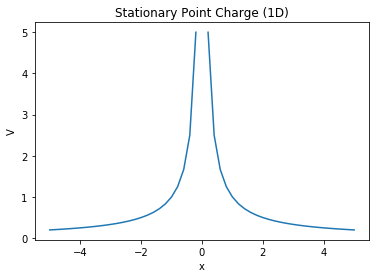

In [4]:
plt.plot(x,V_point_1D)
plt.xlabel("x")
plt.ylabel("V")
plt.title("Stationary Point Charge (1D)")
plt.show()

This looks as expected. Now, to move on to the 2-dimensional case.

In [5]:
y = np.linspace(-5,5,n)

# We have to turn x into a row vector and y into a column vector so that the combinations makes an n x n space
x = x.reshape(1,n)
y = y.reshape(n,1)

#Solve for r and potential as before
r_2D = np.sqrt(x**2 + y**2)
V_point_2D =  1/r_2D

C:\Users\benma\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


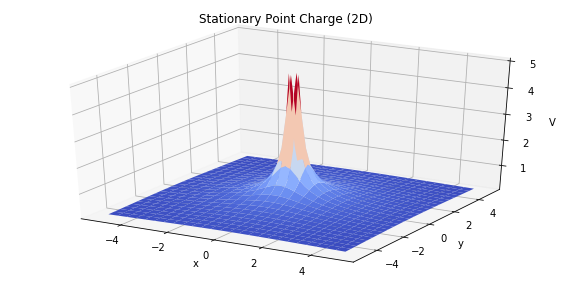

In [6]:
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize = (10,5))
ax = fig.gca(projection='3d')
sur = ax.plot_surface( X, Y, V_point_2D, cmap=cm.coolwarm )
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("V")
plt.title("Stationary Point Charge (2D)")
plt.show()

The potential is still looking okay. Now, for the 3D case:

In [7]:
x = np.linspace(-5,5,n)
x = x.reshape(n,1,1)
y = np.linspace(-5,5,n)
y = y.reshape(1,n,1)
z = np.linspace(-5,5,n)
z = z.reshape(1,1,n)

# reshape to make n x n x n space

template = np.ones((n,n,n))
x = x*template
y = y*template
z = z*template

#Solve for r and potential as before
r_3D = np.sqrt(x**2 + y**2 + z**2)
V_point_3D =  1/r_3D

C:\Users\benma\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


The issue we run into here is that this is beyond human visualization. However, not all hope is lost. I can simply take a slice of the z-axis, and retrive the 2D case.

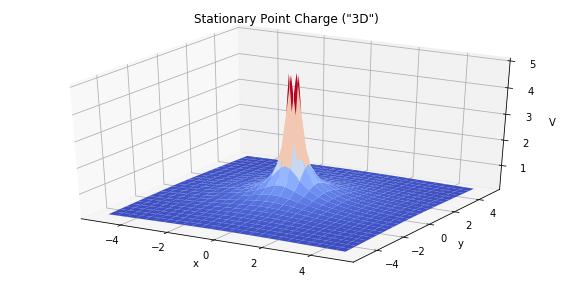

In [8]:
X, Y = np.meshgrid( np.linspace(-5,5,n),  np.linspace(-5,5,n))

center_index = int(n/2) # middle of the axis

fig = plt.figure(figsize = (10,5))
ax = fig.gca(projection='3d')
sur = ax.plot_surface( X, Y, V_point_3D[center_index,:,:], cmap=cm.coolwarm )
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("V")
plt.title("Stationary Point Charge (\"3D\")")
plt.show()

As expected, it looks the same as before. Now that we have a proper scalar potential, we can solve for the an electric field.

Using a combination of numpy's gradient function and vector fields, we can visualize this.

In [9]:
# gradient function will return list of derivatives in respective direction
grad_V_point = np.gradient(V_point_3D)

E_point = np.array([ -grad_V_point[1][:,:,center_index], -grad_V_point[0][:,:,center_index]])


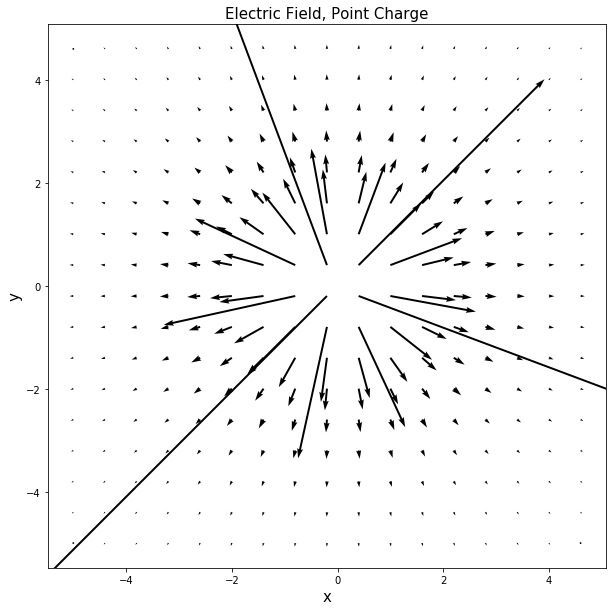

In [10]:
plt.figure(figsize=(10,10))
plt.quiver(X[::3,::3],Y[::3,::3], E_point[0][::3,::3], E_point[1][::3,::3])
plt.xlabel("x", fontsize =15)
plt.ylabel("y",fontsize =15)
plt.title("Electric Field, Point Charge", fontsize =15)
plt.show()

The size of the arrows shows the strength of the electric field, and we know that the electric field for a point charge is given by:

\begin{equation}
\textbf{E} = - \nabla V =  \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2} \hat{\textbf{r}}
\end{equation}

So success! We retrieved the known electric field. Slight problem though: 
Up to this point, I have done nothing with the 4-Vector Potential. However, we can now construct and analyze that (even if it is a somewhat trivial case)

In [11]:
A = np.zeros((n,n,n))

# put this in 4-vector form
point_4potential = np.array([V_point_3D, A, A, A])

Now the challenge will be extracting the information we want.

In [12]:
point_4potential_grad = np.gradient(point_4potential)

E_point = np.array([-point_4potential_grad[2][0,:,:,center_index], -point_4potential_grad[1][0,:,:,center_index]])


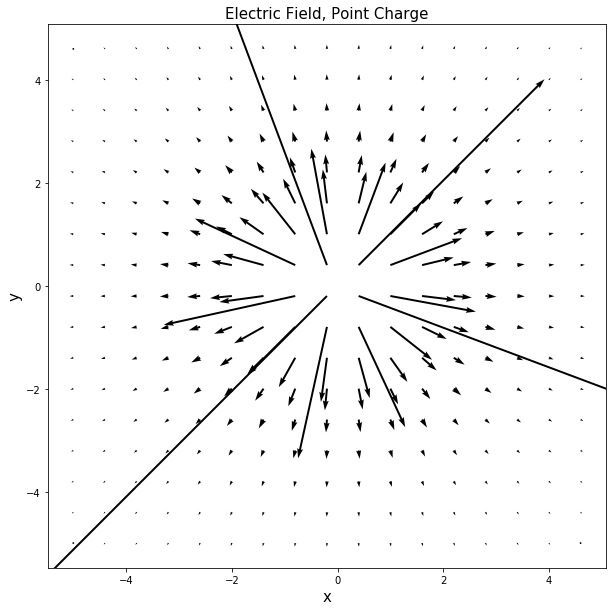

In [13]:
plt.figure(figsize=(10,10))
plt.quiver(X[::3,::3],Y[::3,::3], E_point[0][::3,::3], E_point[1][::3,::3])
plt.xlabel("x", fontsize =15)
plt.ylabel("y",fontsize =15)
plt.title("Electric Field, Point Charge", fontsize =15)
plt.show()

Ah-ha! We have extracted the electric field from the 4-vector potential. Technically, we can do the magnetic field too.

Unfortunately, numpy has no curl funciton (and I don't like the ones available), but that's okay, we can be clever. We have the derivatives from gradient, so we'll just define one:

\begin{equation}
\nabla \times \textbf{f} = (\frac{\partial f_z}{\partial y} - \frac{\partial f_y}{\partial z}) \hat{\textbf{x}} +  (\frac{\partial f_x}{\partial z} - \frac{\partial f_z}{\partial x}) \hat{\textbf{y}} +  (\frac{\partial f_y}{\partial x} - \frac{\partial f_x}{\partial y}) \hat{\textbf{z}}
\end{equation}

In [14]:
def curl(vector):
    
    grad = np.gradient(vector)
    #gradient returns list in the form of a meaningless derivative, df/dz, df/dy, df/dx
    
    dfxdy = grad[2][0]
    dfxdz = grad[1][0]
    dfydx = grad[3][1]
    dfydz = grad[1][1]
    dfzdx = grad[3][2]
    dfzdy = grad[2][2]
    
    output_x = dfzdy - dfydz
    output_y = dfxdz - dfzdx
    output_z = dfydx - dfxdy 
    
    return np.array([output_x, output_y, output_z])
    
    

C:\Users\benma\Anaconda3\lib\site-packages\matplotlib\quiver.py:696: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\benma\Anaconda3\lib\site-packages\matplotlib\quiver.py:696: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
C:\Users\benma\Anaconda3\lib\site-packages\matplotlib\quiver.py:748: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
C:\Users\benma\Anaconda3\lib\site-packages\matplotlib\quiver.py:762: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


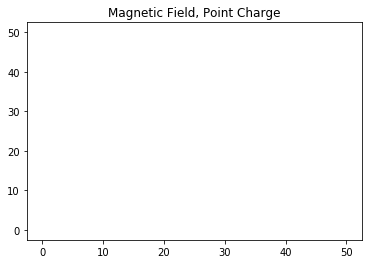

In [15]:
B_point = curl(point_4potential[1:])
plt.quiver( B_point[0][:,:,center_index], B_point[1][:,:,center_index])
plt.title("Magnetic Field, Point Charge")
plt.show()

Huzzah! We showed 0 = 0. But, now we have the setup for later problems.

Now that we understand how the analyze this problem, we can look at more interesting examples.

## Infinite Line Current

Let's look at a case that is more pertinent to the magnetic field. An infinite wire carrying a constant current. There is no charge density, and thus, no scalar potential. From Problem 5.26 we have:

\begin{equation}
V = 0
\end{equation}

\begin{equation}
\textbf{A} = - \frac{\mu_0 I}{4 \pi R^2} (r^2-R^2) \hat{\textbf{z}} \hspace{0.5in} r \leq R
\end{equation}


\begin{equation}
\textbf{A} = - \frac{\mu_0 I}{2 \pi} \ln(r/R) \hat{\textbf{z}} \hspace{0.5in} r \geq R
\end{equation}

where a is an arbitrary reference point (since infinity doesn't work here). 

In [16]:
V_line = np.zeros((n,n,n))

#once again, I will set to 1 what I can
A_line_inside = - (1/4) * (r_2D**2 - 1)
A_line_outside = - (1/2) * np.log( np.abs(r_2D) + 0.00000001) #small adjustment to avoid undefined value


#Now to select proper regions
#Inside will be negative outside, outside will be negative inside (if that makes any sense)

A_line_inside = np.where(A_line_inside >=0, A_line_inside, A_line_inside*0 )
A_line_outside = np.where(A_line_outside <0, A_line_outside, A_line_outside*0 )

A_line_z = A_line_inside + A_line_outside
A_line_z = A_line_z*template

A_line_x = A_line_y =  np.zeros((n,n,n))

line_4potential = np.array([V_line, A_line_x,  A_line_y, A_line_z  ])

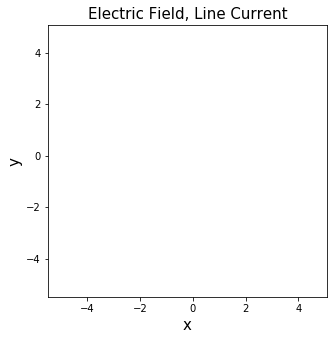

In [17]:
line_4potential_grad = np.gradient(line_4potential)

E_line = np.array([-line_4potential_grad[2][0,:,:,center_index,], -line_4potential_grad[1][0,:,:,center_index]])

plt.figure(figsize=(5,5))
plt.quiver(X[::3,::3],Y[::3,::3], E_line[0][::3,::3], E_line[1][::3,::3])
plt.xlabel("x", fontsize =15)
plt.ylabel("y",fontsize =15)
plt.title("Electric Field, Line Current", fontsize =15)
plt.show()

Math checks out. With no scalar potential, we see no electric field.

In [18]:
# showing outline of wire
a = np.linspace(-5,5,n)
circle_top = np.sqrt(1 - a**2)
circle_bottom = - circle_top


C:\Users\benma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


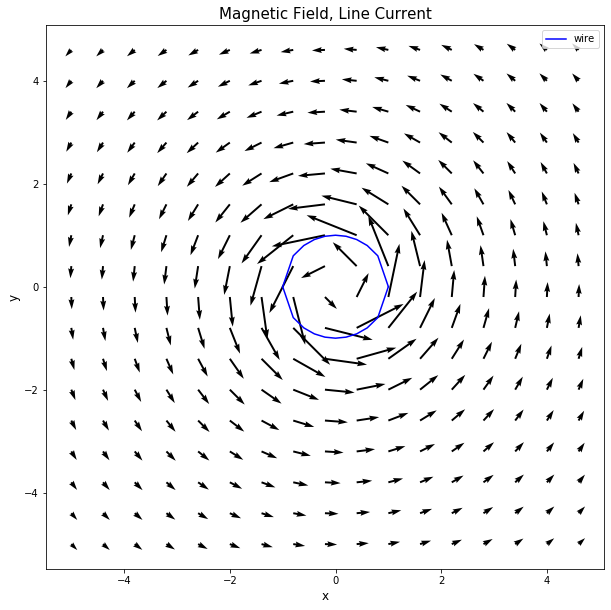

In [19]:
B_line = curl(line_4potential[1:])
plt.figure(figsize=(10,10))
plt.quiver(X[::3,::3],Y[::3,::3], B_line[0][center_index,:,:][::3,::3], B_line[1][center_index,:,:][::3,::3])
plt.title("Magnetic Field, Line Current", fontsize = 15)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y" , fontsize = 12)

plt.plot(a,circle_top, color = "blue", label = "wire")
plt.plot(a,circle_bottom , color = "blue")
plt.legend()
plt.show()

There's that familiar magnetic field pattern with the blue circle showing the wire. Everything checks out here.

## Moving Point Charge

From the Liénard-Wiechert potentials, we know that a moving point charge can be described by:

\begin{equation}
V(\textbf{r},t) = \frac{1}{4 \pi \epsilon_0} \frac{qc}{r c - \textbf{r} \cdot \textbf{v} } \hspace{0.5in} \textbf{A}(\textbf{r},t) = \frac{\textbf{v}}{c^2} V (\textbf{r} ,t )
\end{equation} 

(I can't do the fancy cursive r in jupyter, but that's okay because I can define it to be just r)

We're going to define a charge moving with constant velocity down the z axis:

\begin{equation}
\textbf{v} = 0.5 c \hat{\textbf{z}}
\end{equation}

Which gives:

\begin{equation}
\textbf{r} \cdot \textbf{v} = 0.5 c r \cos \theta = 0.5 c r \frac{z}{r} = 0.5cz
\end{equation}

\begin{equation}
V(\textbf{r},t) = \frac{1}{4 \pi \epsilon_0} \frac{q}{rc - 0.5c z} \hspace{0.5in} \textbf{A}(\textbf{r},t) = \frac{0.5}{c}\frac{1}{4 \pi \epsilon_0} \frac{q}{rc - 0.5c z}  \hat{\textbf{z}}
\end{equation} 

Or setting constants to 1:

\begin{equation}
V = \frac{1}{r-0.5z} \hspace{0.5in} \textbf{A} = \frac{0.5}{r-0.5z}\hat{\textbf{z}}
\end{equation}

Things are going to look a little different with this approach because now we have to consider a time-dependence. 

In [20]:
#Begin with charge at one end of axis
z = np.linspace(0,10,n)

#move charge, we'll treat it that every unit of n is 0.5c
shift = z.reshape(n,1)*-1

z = z + shift

#each row of r represents a different time

template_4D = np.ones((n,n,n,n))

x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)

x = x.reshape(n,1,1,1)
y = y.reshape(1,n,1,1)
z = z.reshape(1,1,n,n)*-1    #z's sign gets flipped around somewhere

x = x*template_4D
y = y*template_4D
z = z*template_4D

r_4D = np.sqrt(x**2 + y**2 + z**2)

#now try and visualize that

V_4D = 1 / (r_4D - 0.5*z) 

C:\Users\benma\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


Now visualizing this will be a bit different. We can look at when it's halfway across the axis:

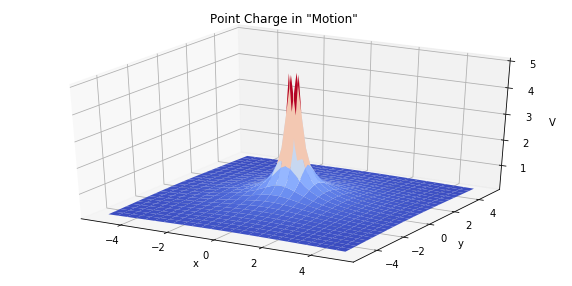

In [21]:
X, Y = np.meshgrid( np.linspace(-5,5,n),  np.linspace(-5,5,n))

fig = plt.figure(figsize = (10,5))
ax = fig.gca(projection='3d')
sur = ax.plot_surface( X, Y, V_4D[:,:,center_index,center_index], cmap=cm.coolwarm )
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("V")
plt.title("Point Charge in \"Motion\" ")
plt.show()

And we get back our normal point charge at the origin potential. 

However, to really appreciate this kind of thing, we should see it motion. Let's look at how the potential evolves at the origin as the charge moves through it.

**Note:** The animations take a bit of time to run

In [22]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

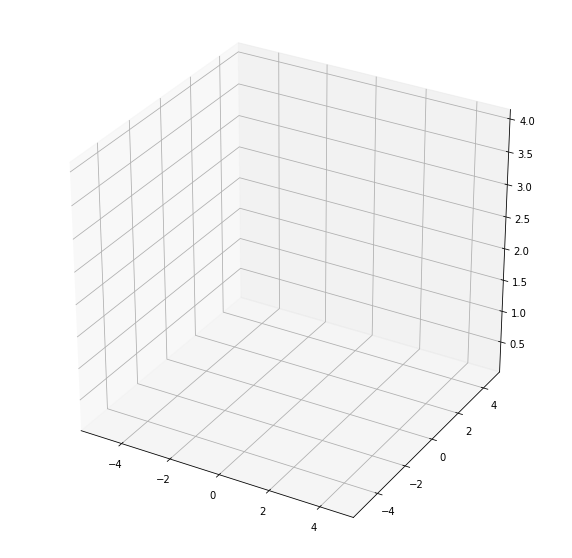

In [23]:
fps = 10 # frame per sec
frn = n # frame number of the animation

# Define the axes
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
# Get the grid
X, Y = np.meshgrid(x, y)


fig = plt.figure(figsize =(10,10))
ax = fig.add_subplot(111, projection='3d')
ims = []
for i in range(frn):
    sf = ax.plot_surface(X[::3,::3], Y[::3,::3], V_4D[:,:,center_index,i][::3,::3], rstride=1, cstride=1, cmap=cm.coolwarm)
    ims.append([sf])

#ax.set_zlim(0,1.1)
ani = animation.ArtistAnimation(fig, ims, interval=1000/fps, blit=True)


In [24]:
plt.rcParams['animation.html'] = 'html5'
ani

As we can see, the potential increases as the moving charge approaches the origin and decreases as it leaves.

Now let's put together our 4-Vector Potential

In [25]:
A_z = 0.5 * V_4D

A_x = A_y = np.zeros((n,n,n,n))

moving_4potential = np.array([V_4D, A_x, A_y, A_z])

Similar idea, let's first make sure we can recover electric field at the origin. Slight difference though because now A is changing with time. So we have to incorporate that too.

In [26]:
moving_4potential_grad = np.gradient(moving_4potential)

In [27]:
E_moving = np.array([-moving_4potential_grad[2][0,:,:,center_index,center_index],
                     -moving_4potential_grad[1][0,:,:,center_index,center_index]])

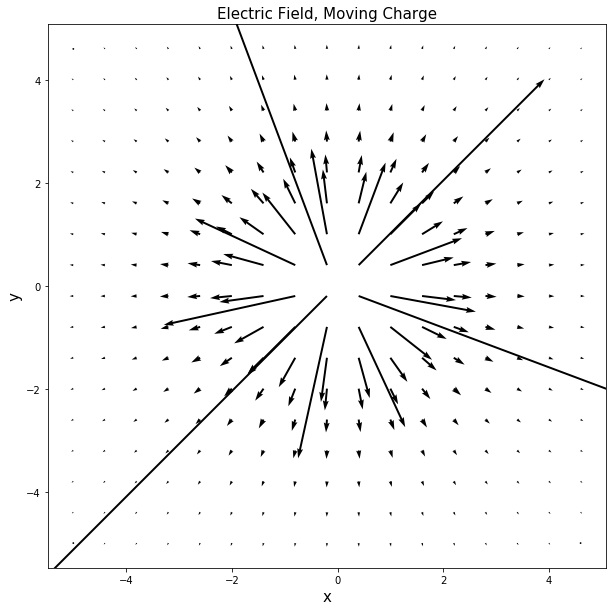

In [28]:

plt.figure(figsize=(10,10))
plt.quiver(X[::3,::3],Y[::3,::3], E_moving[0][::3,::3], E_moving[1][::3,::3])
plt.xlabel("x", fontsize =15)
plt.ylabel("y",fontsize =15)
plt.title("Electric Field, Moving Charge", fontsize =15)
plt.show()

Awesome. Now once again, let's see this in motion

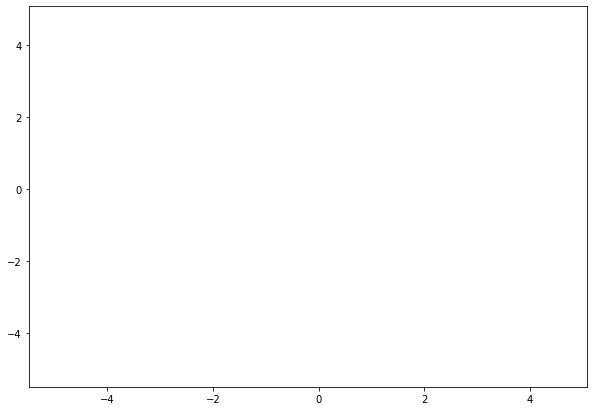

In [29]:
fps = 10 # frame per sec
frn = n # frame number of the animation

# Define the axes
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
# Get the grid
X, Y = np.meshgrid(x, y)


fig = plt.figure(figsize=(10,7))
ims = []
for i in range(frn):
    E_moving = np.array([-moving_4potential_grad[2][0,:,:,center_index,i],
                     -moving_4potential_grad[1][0,:,:,center_index,i]])
    sf = plt.quiver(X[::3,::3],Y[::3,::3], E_moving[0][::3,::3], E_moving[1][::3,::3])
    ims.append([sf])

#ax.set_zlim(0,1.1)
ani = animation.ArtistAnimation(fig, ims, interval=1000/fps, blit=True)

In [30]:
plt.rcParams['animation.html'] = 'html5'
ani

Just like with the potential, we can kind of get this picture of the charge flying past the origin. Let's see this from the view of it moving along the z axis

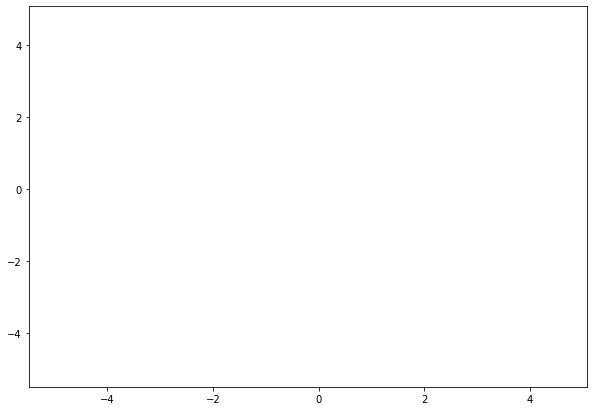

In [31]:
fps = 10 # frame per sec
frn = n # frame number of the animation

# Define the axes
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
# Get the grid
X, Y = np.meshgrid(x, y)


fig = plt.figure(figsize=(10,7))
ims = []
for i in range(frn):
    E_moving = np.array([-moving_4potential_grad[3][0,:,center_index,:,i],
                     -moving_4potential_grad[1][0,:,center_index,:,i]])
    sf = plt.quiver(X[::3,::3],Y[::3,::3], E_moving[0][::3,::3], E_moving[1][::3,::3])
    ims.append([sf])

#ax.set_zlim(0,1.1)
ani = animation.ArtistAnimation(fig, ims, interval=1000/fps, blit=True)

In [32]:
plt.rcParams['animation.html'] = 'html5'
ani

An even better visual. Here, see it traveling to the right along the z-axis. Now, the magnetic field won't be 0 like the original case. Let's see what that looks like.

In [33]:
B_motion = curl(moving_4potential[:3])

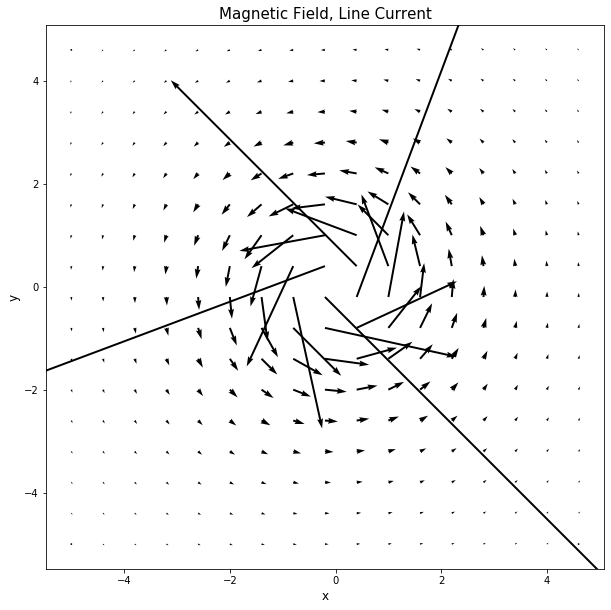

In [34]:


plt.figure(figsize=(10,10))
plt.quiver(X[::3,::3],Y[::3,::3], B_motion[1][:,:,center_index,center_index][::3,::3],
                                  B_motion[2][:,:,center_index,center_index][::3,::3])
plt.title("Magnetic Field, Line Current", fontsize = 15)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y" , fontsize = 12)


plt.show()

Because the charge is in motion, we see it generate a magnetic field as it moves, and it resembles the line current. Let's look at this in time:

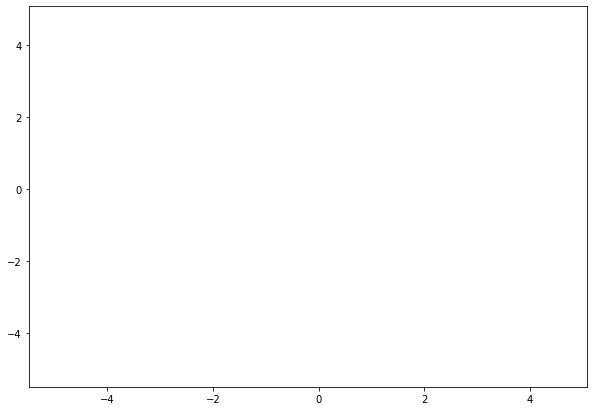

In [35]:
fps = 10 # frame per sec
frn = n # frame number of the animation

# Define the axes
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
# Get the grid
X, Y = np.meshgrid(x, y)


fig = plt.figure(figsize=(10,7))
ims = []
for i in range(frn):
    sf = plt.quiver(X[::3,::3],Y[::3,::3], B_motion[1][:,:,center_index,i][::3,::3],
                                  B_motion[2][:,:,center_index,i][::3,::3])
    ims.append([sf])

#ax.set_zlim(0,1.1)
ani = animation.ArtistAnimation(fig, ims, interval=1000/fps, blit=True)

In [36]:
plt.rcParams['animation.html'] = 'html5'
ani

# Conclusion

Thus, we have accomplished what we set out to do. Given the potentials necessary to construct the 4-Vector potential, we can extract the electric and magnetic fields. Numerically, the 4-vector potential has behaved as expected.